In [1]:
## MACHINE HACK HACKATHON PROJECT : PREDICTING THE PRICE OF RETAIL ITEMS

In [2]:
# Importing Neccessary Libraries
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [3]:
#Get current working directory

os.getcwd()

'C:\\Users\\SAI VIVEK.K\\Retail Price Prediction_Machine Hack_Hackathon'

In [4]:
os.chdir('C:\\Users\\SAI VIVEK.K\\Retail Price Prediction_Machine Hack_Hackathon')

In [5]:
# Reading the Data

Retail_train = pd.read_csv("Train.csv")
Retail_test = pd.read_csv("Test.csv")

In [6]:
Retail_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [7]:
Retail_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [8]:
# EXPLORATORY DATA ANALYSIS

# 1) Identification of Varibales and Datatypes

In [9]:
Retail_train.dtypes

InvoiceNo        int64
StockCode        int64
Description      int64
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country          int64
dtype: object

In [10]:
Retail_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [11]:
Retail_train.shape

(284780, 8)

In [12]:
Retail_test.shape

(122049, 7)

In [13]:
# Basic Statistics
#Retail_train.describe()

In [14]:
# Checking for the missing values
Retail_train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
#Check for skewness in the dataset
Retail_train.skew()

InvoiceNo       -0.079704
StockCode        0.271247
Description     -0.133967
Quantity         0.226115
UnitPrice      438.340508
CustomerID       0.029524
Country         -3.050125
dtype: float64

In [16]:
# 2) Graphical Univariate Analysis
#Distribution of dependent variable


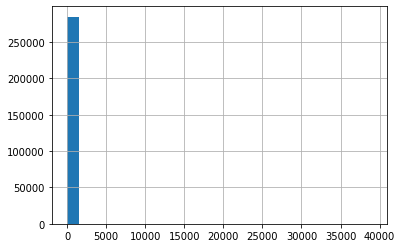

In [17]:
Retail_train.UnitPrice.hist(bins = 25)
print()

In [18]:
Retail_train.UnitPrice.skew() #Highly skewed scaling needs to done before applying any regression model

438.3405083657168

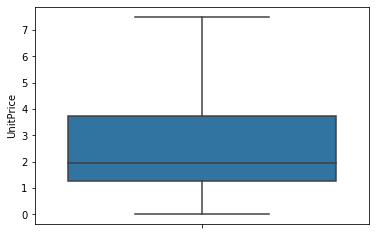

In [19]:
sns.boxplot(y = 'UnitPrice',data = Retail_train, showfliers = False)

plt.show()

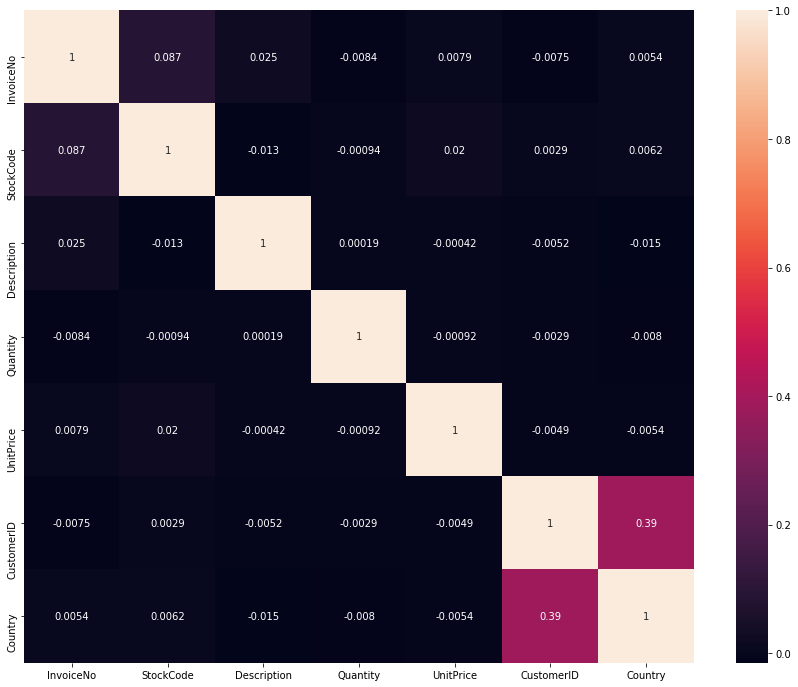

In [20]:
#Correlation Heat Map
Corr = Retail_train.corr()
plt.figure(figsize = (15,12))
sns.heatmap(Corr, annot = True)

plt.show()

In [21]:
corr_matrix = Retail_train.corr(method='pearson')
corr_matrix

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceNo,1.000000,0.086809,0.024804,-0.008363,0.007927,-0.007463,0.005432
StockCode,0.086809,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242
Description,0.024804,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791
Quantity,-0.008363,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001
UnitPrice,0.007927,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378
CustomerID,-0.007463,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198
Country,0.005432,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000


In [22]:
#corrleation with the Target Value
corr_matrix.UnitPrice.sort_values(ascending=False)

UnitPrice      1.000000
StockCode      0.020073
InvoiceNo      0.007927
Description   -0.000424
Quantity      -0.000924
CustomerID    -0.004932
Country       -0.005378
Name: UnitPrice, dtype: float64

In [23]:
#Drop Irrelevant Columns
Retail_train.drop('InvoiceNo',axis = 1,inplace = True)


In [24]:
Retail_train.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [25]:
# 3) Non - Graphical Univariate Analysis
# Get number of unique entries in each column




In [26]:
Retail_train.nunique()

StockCode       3619
Description     3819
Quantity         373
InvoiceDate    19451
UnitPrice        524
CustomerID      4339
Country           37
dtype: int64

In [27]:
Retail_train.InvoiceDate.value_counts()

2011-11-28 15:54:00    385
2011-11-14 15:27:00    384
2011-12-05 17:17:00    361
2011-10-31 14:09:00    311
2011-11-23 13:39:00    307
                      ... 
2011-06-14 15:16:00      1
2011-08-22 11:00:00      1
2011-11-30 15:12:00      1
2011-05-20 14:56:00      1
2011-01-18 15:30:00      1
Name: InvoiceDate, Length: 19451, dtype: int64

In [28]:
Retail_train.Country.value_counts(ascending = False)


35    253253
14      6653
13      5946
10      5244
30      1776
23      1680
3       1435
32      1293
26      1049
0        883
24       766
18       561
6        537
12       489
7        424
31       325
1        303
9        273
25       244
19       238
33       210
17       185
36       171
29       152
16       132
5        106
15       101
22        89
34        52
27        47
11        40
20        34
8         26
21        25
4         20
2         10
28         8
Name: Country, dtype: int64

In [29]:
# DATA PREPROCESSING AND CLEANING

In [30]:
Retail_train.dtypes

StockCode        int64
Description      int64
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country          int64
dtype: object

In [31]:
#Seperate Categorical and Numerical Columns ## Fetch categorical and numerical columns
cat_cols = Retail_train.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

num_cols = Retail_train.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)

['InvoiceDate']
['StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country']


In [32]:
# Convert InvoiceDate to date-time
Retail_train['InvoiceDate'] = pd.to_datetime(Retail_train['InvoiceDate'], format='%Y-%m-%d %H:%M:%S').dt.year
#Retail_train['InvoiceDate'] = Retail_train['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')
#Retail_train['InvoiceDate'] = pd.to_datetime(Retail_train['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

In [33]:
Retail_train.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1583,144,3,2011,3.75,14056.0,35
1,1300,3682,6,2011,1.95,13098.0,35
2,2178,1939,4,2011,5.95,15044.0,35
3,2115,2983,1,2011,0.83,15525.0,35
4,1210,2886,12,2011,1.65,13952.0,35


In [34]:
Retail_train.dtypes

StockCode        int64
Description      int64
Quantity         int64
InvoiceDate      int64
UnitPrice      float64
CustomerID     float64
Country          int64
dtype: object

In [35]:
# FEATURE ENGINEERING

In [36]:
#X, y = Retail_train.loc[:,Retail_train.columns!='UnitPrice'].values, Retail_train.loc[:,'UnitPrice'].values

In [37]:
#Seperating Target Varibale into y
y = Retail_train['UnitPrice']
X = Retail_train.drop('UnitPrice',axis = 1)

In [38]:
# Applying Power Transformer to the Target variable (y) as normality is desired/make data more Gaussian-Like
#from sklearn.preprocessing import PowerTransformer
#y = y.values.reshape(-1,1)
# power transform the raw data
#power = PowerTransformer(method='yeo-johnson', standardize=True)
#y = power.fit_transform(y)

In [39]:
# Split data into train and test format
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 123)

In [40]:
print(X_train.shape)
print(X_test.shape)

(227824, 6)
(56956, 6)


In [41]:
print(y_train.shape)
print(y_test.shape)

(227824,)
(56956,)


In [42]:
# MACHINE LEARNING MODEL BUILDING

In [43]:
#Columns to use for Modelling
num_attr = list(Retail_train.select_dtypes("int64","float64").columns)

In [44]:
num_attr

['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Country']

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

In [46]:
# Intiating the Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [47]:
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])



In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
         ])

In [49]:
Model_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
#BUILD LINEAR REGRESSION MODEL 1
Model_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['StockCode', 'Description',
                                                   'Quantity', 'InvoiceDate',
                                                   'Country'])])),
                ('regressor', LinearRegression())])

In [52]:
train_pred = Model_logreg.predict(X_train)
test_pred = Model_logreg.predict(X_test)

print(Model_logreg.score(X_train, y_train))
print(Model_logreg.score(X_test, y_test))


0.002080815270732783
0.00017247448970780788


In [53]:
test_pred

array([2.90952264, 3.339657  , 5.27294906, ..., 2.38782275, 2.83840545,
       3.56034869])

In [54]:
#Defining Custom Function 
def convert_for_sklearn(label_list):
    return [1 if i == 1 else 0 for i in label_list]


def rmse_metric(y_true, y_pred):
    
    y_test_scoring = convert_for_sklearn(y_true)
    test_pred_scoring = convert_for_sklearn(y_pred)

    rmse = mean_squared_error(y_true= y_test_scoring, y_pred = test_pred_scoring)
    
    print("Test RMSE_score: ",rmse)

In [55]:
rmse_metric(y_true = y_test, y_pred = test_pred)

Test RMSE_score:  0.0002458037783552216


In [56]:
#Read testing data
Retail_test = pd.read_csv("Test.csv")
Retail_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [57]:
# Convert InvoiceDate to date-time
Retail_test['InvoiceDate'] = pd.to_datetime(Retail_test['InvoiceDate'], format='%Y-%m-%d %H:%M:%S').dt.year

In [58]:
Retail_test.drop('InvoiceNo',axis = 1,inplace = True)

In [59]:
Retail_test.head()

,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,1709,1079,3,2011,16161.0,35
1,510,3457,1,2010,17341.0,35
2,604,694,36,2011,15158.0,35
3,1478,3473,2,2011,16033.0,35
4,3216,871,1,2011,15351.0,35


In [60]:
Retail_test.dtypes

StockCode        int64
Description      int64
Quantity         int64
InvoiceDate      int64
CustomerID     float64
Country          int64
dtype: object

In [61]:
# apply the whole pipeline to data
Final_test = Retail_test
#
test_pred = Model_logreg.predict(Final_test)

In [62]:
test_pred[0:10]

array([3.42318946, 1.52827494, 1.6811118 , 2.98939533, 5.80996825,
       4.43160496, 1.07434085, 2.78594227, 4.39738623, 6.1031337 ])

In [63]:
#Using pandas, one can do submission_df.to_csv('my_submission_file.csv', index=False)

In [64]:
#submissions_df = pd.DataFrame({'UnitPrice': test_pred})
#submissions_df.to_csv("my_submission_file.csv", index=False)
#submissions_df.head()

In [65]:
#Build KNN REGRESSOR MODEL NO 2
knn_reg = KNeighborsRegressor(n_neighbors = 3,  weights = 'distance', p=1)
knn_reg.fit(X_train, y_train)
print(knn_reg.score(X_test, y_test ))   
y_pred = knn_reg.predict(X_test)

-0.0149856266001418


In [66]:
y_pred

array([1.65, 7.95, 0.42, ..., 0.42, 8.5 , 0.42])

In [67]:
# apply the whole pipeline to data
Knn_test = Retail_test
#
test_pred_knn = knn_reg.predict(Knn_test)

In [68]:
test_pred_knn[0:10]

array([ 1.65      ,  1.25      ,  3.89176663,  1.58382762, 12.75      ,
        1.57081331,  2.95      ,  3.37472507,  2.05170319,  3.75      ])

In [69]:
submissions_df = pd.DataFrame({'UnitPrice': test_pred_knn})
submissions_df.to_csv("my_submission_file.csv", index=False)
submissions_df.head()

,UnitPrice
0,1.650000
1,1.250000
2,3.891767
3,1.583828
4,12.750000


In [70]:
#SAVING THE MODEL AS A PICKLE FILE

In [71]:
import pickle

In [72]:
with open('knn_model_pkl', 'wb') as f:
    pickle.dump(knn_reg,f)

In [73]:
import joblib

In [74]:
joblib.dump(knn_reg, 'knn_model_joblib')

['knn_model_joblib']

In [75]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(knn_reg, open(filename, 'wb'))

 

In [77]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

-0.0149856266001418
